# Intervalos de confianza
## Ejercicio 1:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy import sqrt

In [19]:
np.random.seed(10)
x = stats.norm.rvs(size=20, loc=3, scale=2)
x

array([ 5.66317301,  4.43055795, -0.09080058,  2.9832323 ,  4.24267195,
        1.55982888,  3.53102317,  3.21709705,  3.00858286,  2.65079958,
        3.86605238,  5.40607475,  1.06986866,  5.05654816,  3.45726026,
        3.89027523,  0.72679558,  3.27027376,  5.969074  ,  0.84039023])

### IC del 95% para mu

In [5]:
q975=stats.norm.ppf(0.975)
print(q975)

1.959963984540054


In [6]:
print(f"Intervalo de confianza_mu,95%: ({x.mean() - q975*2/sqrt(len(x))},{x.mean() + q975*2/sqrt(len(x))})")

Intervalo de confianza_mu,95%: (2.360916417249774,4.1139614984029365)


### Cota inferior del 95% para mu

In [20]:
q95=stats.norm.ppf(0.95)
print(q95)

1.6448536269514722


In [21]:
print(f"Cota inferior_mu,95%: {x.mean() - q95*2/sqrt(len(x))}")

Cota inferior_mu,95%: 2.5018380532462405


## Distribución t-Student

In [7]:
x = np.linspace(-4,4,1000)

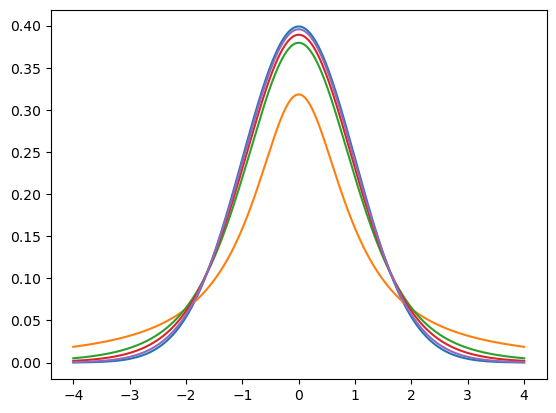

In [8]:
plt.plot(x, stats.norm.pdf(x), color='C0')
plt.plot(x, stats.t.pdf(x,df=1), color='C1')
plt.plot(x, stats.t.pdf(x,df=5), color='C2')
plt.plot(x, stats.t.pdf(x,df=10), color='C3')
plt.plot(x, stats.t.pdf(x,df=30), color='C4')

### Obs: t de Student converge a la Normal a medida que gl=n-1 aumentan

## Ejercicio 2:

2.317686447260258

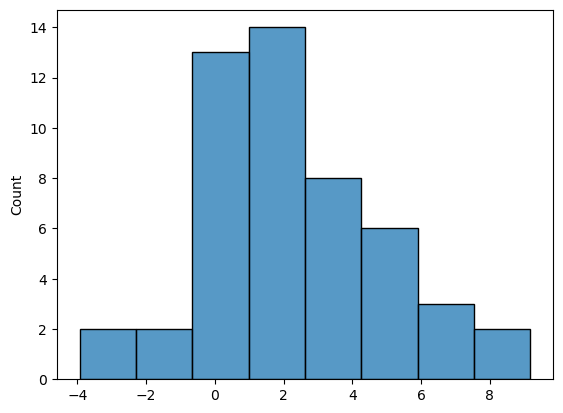

In [9]:
x = stats.norm.rvs(size=50, loc=2, scale=3)
sns.histplot(x)
x.mean()

### IC del 99% para mu

In [10]:
t995= stats.t.ppf(0.995,df=49)
t995

2.67995197363155

In [11]:
print(f"Intervalo de confianza_mu,99%: ({x.mean()-t995*x.std(ddof=1)/sqrt(len(x))},{x.mean()+t995*x.std(ddof=1)/sqrt(len(x))})")

Intervalo de confianza_mu,99%: (1.2870418453582022,3.3483310491623133)


In [12]:
print(f"Error de estimación: {t995*x.std(ddof=1)/sqrt(len(x))}")

Error de estimación: 1.0306446019020556


# Intervalos de confianza asintóticos
## Ejercicio 3:

In [22]:
n = 50
pgorro = 3/5
s_pgorro = np.sqrt((pgorro*(1-pgorro)/n))
q975 = stats.norm.ppf(0.975)
q975

1.959963984540054

### IC del 95% para p

In [14]:
print(f"Intervalo de confianza_p,95%: ({pgorro - q975*s_pgorro},{pgorro + q975*s_pgorro})")

Intervalo de confianza_p,95%: (0.46420971191085936,0.7357902880891406)


In [15]:
print(f"Error de estimación: {q975*s_pgorro}")

Error de estimación: 0.13579028808914062


## Ejercicio 4:

In [16]:
data = pd.read_csv('Islander_data.csv')
data.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [17]:
x=data.Mem_Score_After

In [18]:
prom = x.mean()
s = x.std(ddof=1)
rn = np.sqrt(len(x))

In [19]:
print(f"Intervalo de confianza_mu,95%: ({prom-q975*s/rn},{prom+q975*s/rn} )")

Intervalo de confianza_mu,95%: (58.3963839254633,63.448060518981166 )
